In [20]:
import json
with open("benchmark_results.json") as f:
    results = json.load(f)

In [21]:
from collections import defaultdict


sizes = []
mean_times = defaultdict(list)
for size, size_data in results.items():
    sizes.append(size)
    for name, data in size_data.items():
        mean_times[name].append(data["mean"])


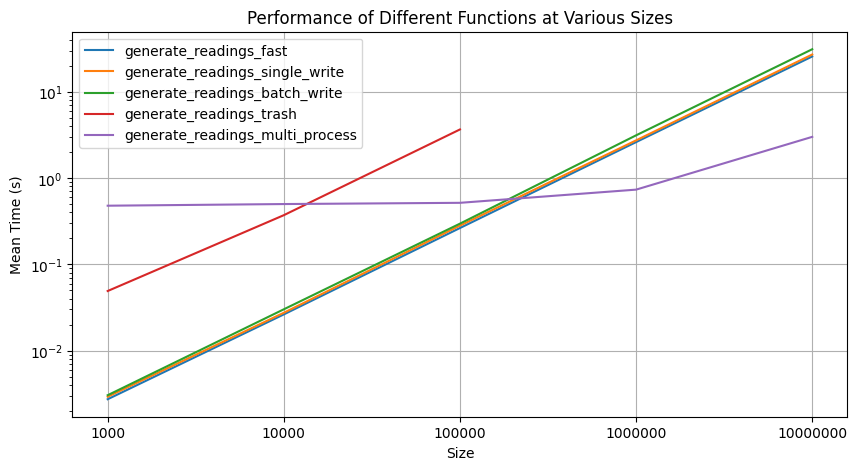

In [22]:
import matplotlib.pyplot as plt

def plot(m_times, title, output, scale_log):
    plt.figure(figsize=(10, 5))
    for name, times in m_times.items():
        plt.plot(sizes[:len(times)], times, label=name)
    plt.xlabel('Size')
    plt.ylabel('Mean Time (s)')
    plt.title(title)
    plt.xticks(sizes)  # Ensure all sizes are shown as x-ticks
    plt.legend()
    plt.grid(True)
    if scale_log:
        plt.yscale('log')
    plt.savefig(output)

    plt.show()

plot(mean_times, "Performance of Different Functions at Various Sizes", "benchmark_results.png", True)


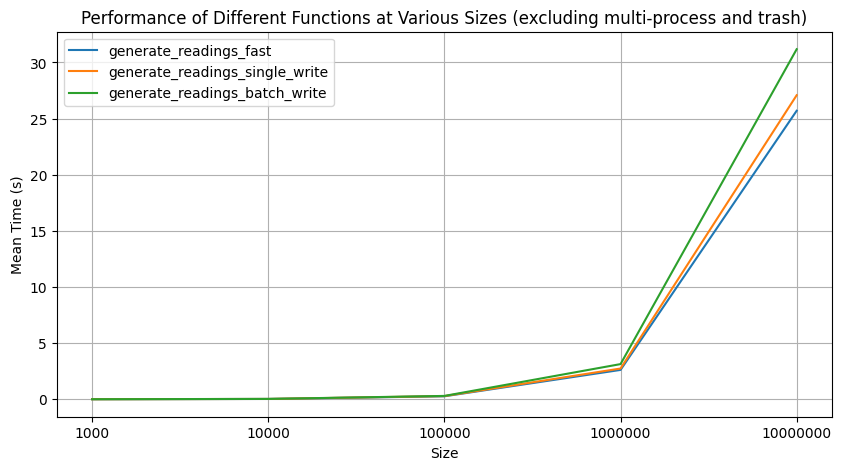

In [23]:
mean_times.pop("generate_readings_multi_process")
mean_times.pop("generate_readings_trash")
plot(mean_times, "Performance of Different Functions at Various Sizes (excluding multi-process and trash)", "benchmark_results_no_multi_process.png", False)